In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r'/Users/Lutz/Desktop/spiced_projects/discrete-dill-student-code/J3L/data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, delimiter=';', index_col=None, header=0)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    #df['day'] = df.iloc[0,0].dayofweek
    df['day'] = df['timestamp'].dt.day_name()
    li.append(df)
    

frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame.set_index('timestamp')

In [3]:
frame.shape

(24877, 3)

In [16]:
frame.head()

,customer_no,location,day
timestamp,,,
2019-09-03 07:02:00,1,fruit,Tuesday
2019-09-03 07:02:00,2,drinks,Tuesday
2019-09-03 07:03:00,3,dairy,Tuesday
2019-09-03 07:05:00,1,drinks,Tuesday
2019-09-03 07:06:00,4,dairy,Tuesday


<AxesSubplot:ylabel='timestamp'>

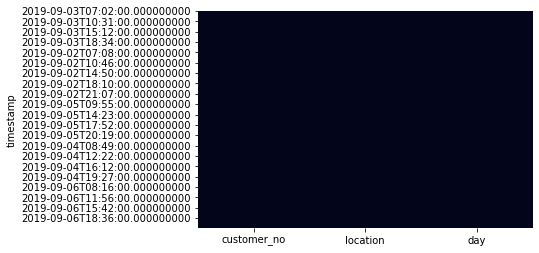

In [5]:
sns.heatmap(frame.isnull(), cbar = False)

In [6]:
# Calculate the total number of customers in each section
frame_cust_section = frame.groupby('location').count()['customer_no']
frame_cust_section

location
checkout    7417
dairy       4679
drinks      3905
fruit       5122
spices      3754
Name: customer_no, dtype: int64

In [7]:
# Calculate the total number of customers in each section over time 
frame_time_section = frame.reset_index().groupby(['timestamp', 'location'], as_index=False)['customer_no'].count()
frame_time_section

,timestamp,location,customer_no
0,2019-09-02 07:03:00,dairy,2
1,2019-09-02 07:04:00,dairy,2
2,2019-09-02 07:04:00,fruit,1
3,2019-09-02 07:04:00,spices,3
4,2019-09-02 07:05:00,checkout,2
...,...,...,...
13834,2019-09-06 21:50:00,checkout,2
13835,2019-09-06 21:50:00,dairy,1
13836,2019-09-06 21:50:00,drinks,1
13837,2019-09-06 21:50:00,fruit,1


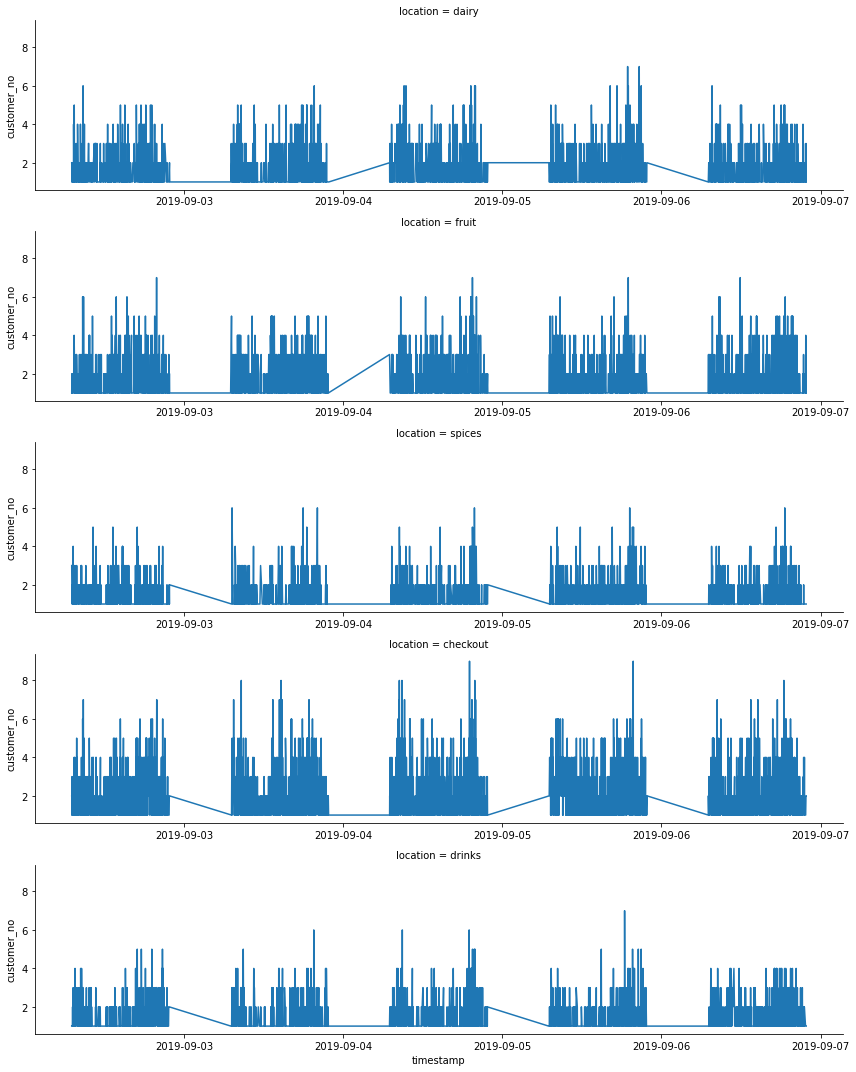

In [8]:
# plot over all sections and time
g = sns.FacetGrid(frame_time_section, row="location",aspect=4,sharex=False)
g.map(sns.lineplot,'timestamp','customer_no')

<AxesSubplot:xlabel='timestamp'>

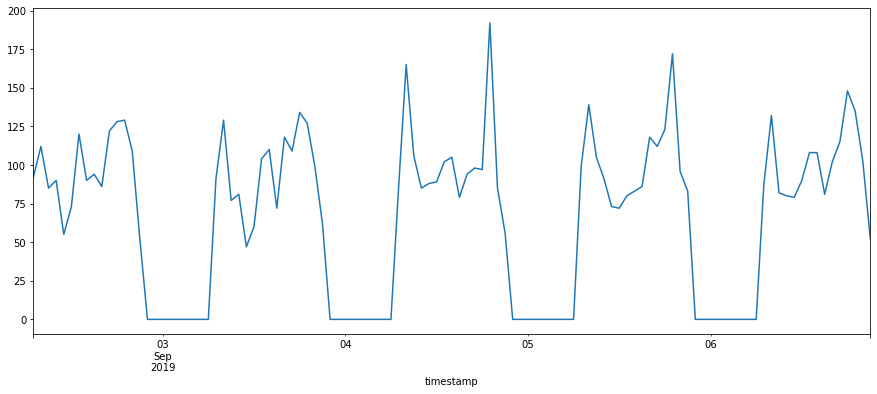

In [9]:
#Display the number of customers at checkout over time
frame_checkout = frame[frame['location'] == 'checkout']
frame_checkout['customer_no'].resample('1H').count().plot(figsize=(15,6))

In [57]:
# Calculate the time each customer spent in the market
frame_cust_min = frame.reset_index().groupby(['day', 'customer_no'])['timestamp'].min()
frame_cust_max = frame.reset_index().groupby(['day', 'customer_no'])['timestamp'].max()
#frame_cust_spent = frame_cust_max['timestamp']- frame_cust_min['timestamp']
#[frame['day'] == 'Monday'].groupby('customer_no').min()

In [67]:
frame_cust_max

day        customer_no
Friday     1             2019-09-06 07:05:00
           2             2019-09-06 07:01:00
           3             2019-09-06 07:11:00
           4             2019-09-06 07:02:00
           5             2019-09-06 07:15:00
                                 ...        
Wednesday  1527          2019-09-04 21:47:00
           1528          2019-09-04 21:48:00
           1529          2019-09-04 21:49:00
           1530          2019-09-04 21:49:00
           1531          2019-09-04 21:49:00
Name: timestamp, Length: 7445, dtype: datetime64[ns]

In [68]:
frame.head()

,customer_no,location,day
timestamp,,,
2019-09-03 07:02:00,1,fruit,Tuesday
2019-09-03 07:02:00,2,drinks,Tuesday
2019-09-03 07:03:00,3,dairy,Tuesday
2019-09-03 07:05:00,1,drinks,Tuesday
2019-09-03 07:06:00,4,dairy,Tuesday


In [88]:
# Calculate the total number of customers in the supermarket over time.
frame_all_cust = frame.drop_duplicates(['customer_no'])
frame_all_cust['customer_no'].count()

1535

In [89]:
#Our business managers think that the first section customers visit follows a different pattern than the     
#following ones. Plot the distribution of customers of their first visited section versus following sections
#(treat all sections visited after the first as “following”)